In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
data = pd.read_csv("formual_E_Raceresults.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SeasonName       1502 non-null   object
 1   RaceName         1502 non-null   object
 2   Pos              1502 non-null   int64 
 3   DriverNumber     1502 non-null   object
 4   DriverFirstName  1502 non-null   object
 5   DriverLastName   1502 non-null   object
 6   Team             1502 non-null   object
 7   Started          1502 non-null   object
 8   Best             1502 non-null   object
 9   Time             1502 non-null   object
 10  PtsPoints        1502 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 129.2+ KB


In [4]:
data.head()

,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,Time,PtsPoints
0,Season 1 2014/15,Beijing E-Prix,1,#11,Lucas,Di Grassi,Audi Sport ABT Formula E Team,2,1:46.718,52:23.413,25
1,Season 1 2014/15,Beijing E-Prix,2,#27,Franck,Montagny,Andretti Autosport Formula E Team,8,1:46.640,+ 2.867,18
2,Season 1 2014/15,Beijing E-Prix,3,#2,Sam,Bird,Virgin Racing Formula E Team,11,1:46.563,+ 6.559,15
3,Season 1 2014/15,Beijing E-Prix,4,#28,Charles,Pic,Andretti Autosport Formula E Team,7,1:46.730,+ 19.301,12
4,Season 1 2014/15,Beijing E-Prix,5,#5,Karun,Chandhok,Mahindra Racing Formula E Team,4,1:45.892,+ 23.952,10


In [5]:
data.drop("Time", axis=1, inplace=True)

In [6]:
data.head()


,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,PtsPoints
0,Season 1 2014/15,Beijing E-Prix,1,#11,Lucas,Di Grassi,Audi Sport ABT Formula E Team,2,1:46.718,25
1,Season 1 2014/15,Beijing E-Prix,2,#27,Franck,Montagny,Andretti Autosport Formula E Team,8,1:46.640,18
2,Season 1 2014/15,Beijing E-Prix,3,#2,Sam,Bird,Virgin Racing Formula E Team,11,1:46.563,15
3,Season 1 2014/15,Beijing E-Prix,4,#28,Charles,Pic,Andretti Autosport Formula E Team,7,1:46.730,12
4,Season 1 2014/15,Beijing E-Prix,5,#5,Karun,Chandhok,Mahindra Racing Formula E Team,4,1:45.892,10


In [7]:
def best_to_float(x):
    splitted = x.split(':')
    value = 0
    try:
        data = float(splitted[0]) * 60 + float(splitted[1])
    except:
        data = float(splitted[0]) * 60
    return data

In [8]:
data.drop(data[data['Best'] == '–'].index, inplace=True)
data['Best'] = data['Best'].str.replace("FL", '', regex=False)
data['Best'] = data['Best'].apply(lambda x: best_to_float(x))

In [9]:
data['Started'] = data['Started'].str.replace("P", '', regex=False)
data['Started'] = data['Started'].apply(lambda x: float(x))

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeasonName       1473 non-null   object 
 1   RaceName         1473 non-null   object 
 2   Pos              1473 non-null   int64  
 3   DriverNumber     1473 non-null   object 
 4   DriverFirstName  1473 non-null   object 
 5   DriverLastName   1473 non-null   object 
 6   Team             1473 non-null   object 
 7   Started          1473 non-null   float64
 8   Best             1473 non-null   float64
 9   PtsPoints        1473 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 126.6+ KB


In [11]:
oe = OrdinalEncoder()
oe_cols = oe.fit_transform(
    data[['DriverFirstName', 'DriverLastName', 'DriverNumber', 'RaceName', 'SeasonName', 'Team']])

data[['DriverFirstName', 'DriverLastName', 'DriverNumber', 'RaceName', 'SeasonName', 'Team']] = oe_cols

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeasonName       1473 non-null   float64
 1   RaceName         1473 non-null   float64
 2   Pos              1473 non-null   int64  
 3   DriverNumber     1473 non-null   float64
 4   DriverFirstName  1473 non-null   float64
 5   DriverLastName   1473 non-null   float64
 6   Team             1473 non-null   float64
 7   Started          1473 non-null   float64
 8   Best             1473 non-null   float64
 9   PtsPoints        1473 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 126.6 KB


In [12]:
data.head()


,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,PtsPoints
0,0.0,1.0,1,2.0,32.0,18.0,5.0,2.0,106.718,25
1,0.0,1.0,2,15.0,15.0,43.0,2.0,8.0,106.640,18
2,0.0,1.0,3,9.0,57.0,4.0,41.0,11.0,106.563,15
3,0.0,1.0,4,16.0,8.0,49.0,2.0,7.0,106.730,12
4,0.0,1.0,5,26.0,28.0,12.0,23.0,4.0,105.892,10


In [13]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

data[['Best']] = sc.fit_transform(data[['Best']])

data.describe()

,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,PtsPoints
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,2.899525,18.966056,7.590631,20.172437,34.132383,33.063815,21.553293,10.949084,0.069723,5.155465
std,1.898070,11.086747,5.829213,11.263102,19.843395,21.308041,12.140764,6.160510,0.238239,7.403244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,10.000000,2.000000,11.000000,16.000000,15.000000,11.000000,6.000000,0.002638,0.000000
50%,3.000000,19.000000,7.000000,18.000000,36.000000,32.000000,22.000000,11.000000,0.004163,1.000000
75%,4.000000,29.000000,12.000000,30.000000,50.000000,52.000000,32.000000,16.000000,0.007626,8.000000
max,6.000000,39.000000,23.000000,40.000000,66.000000,71.000000,41.000000,24.000000,1.000000,30.000000


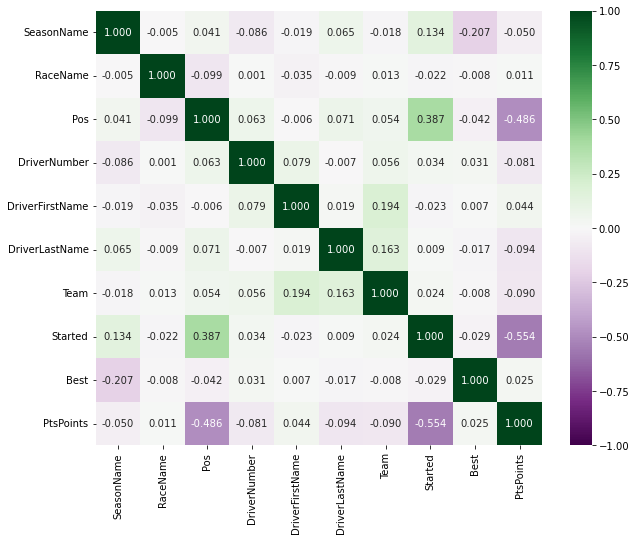

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=data.corr(), annot=True, vmin=-1, vmax=1, fmt='.3f', cmap='PRGn')
plt.show()

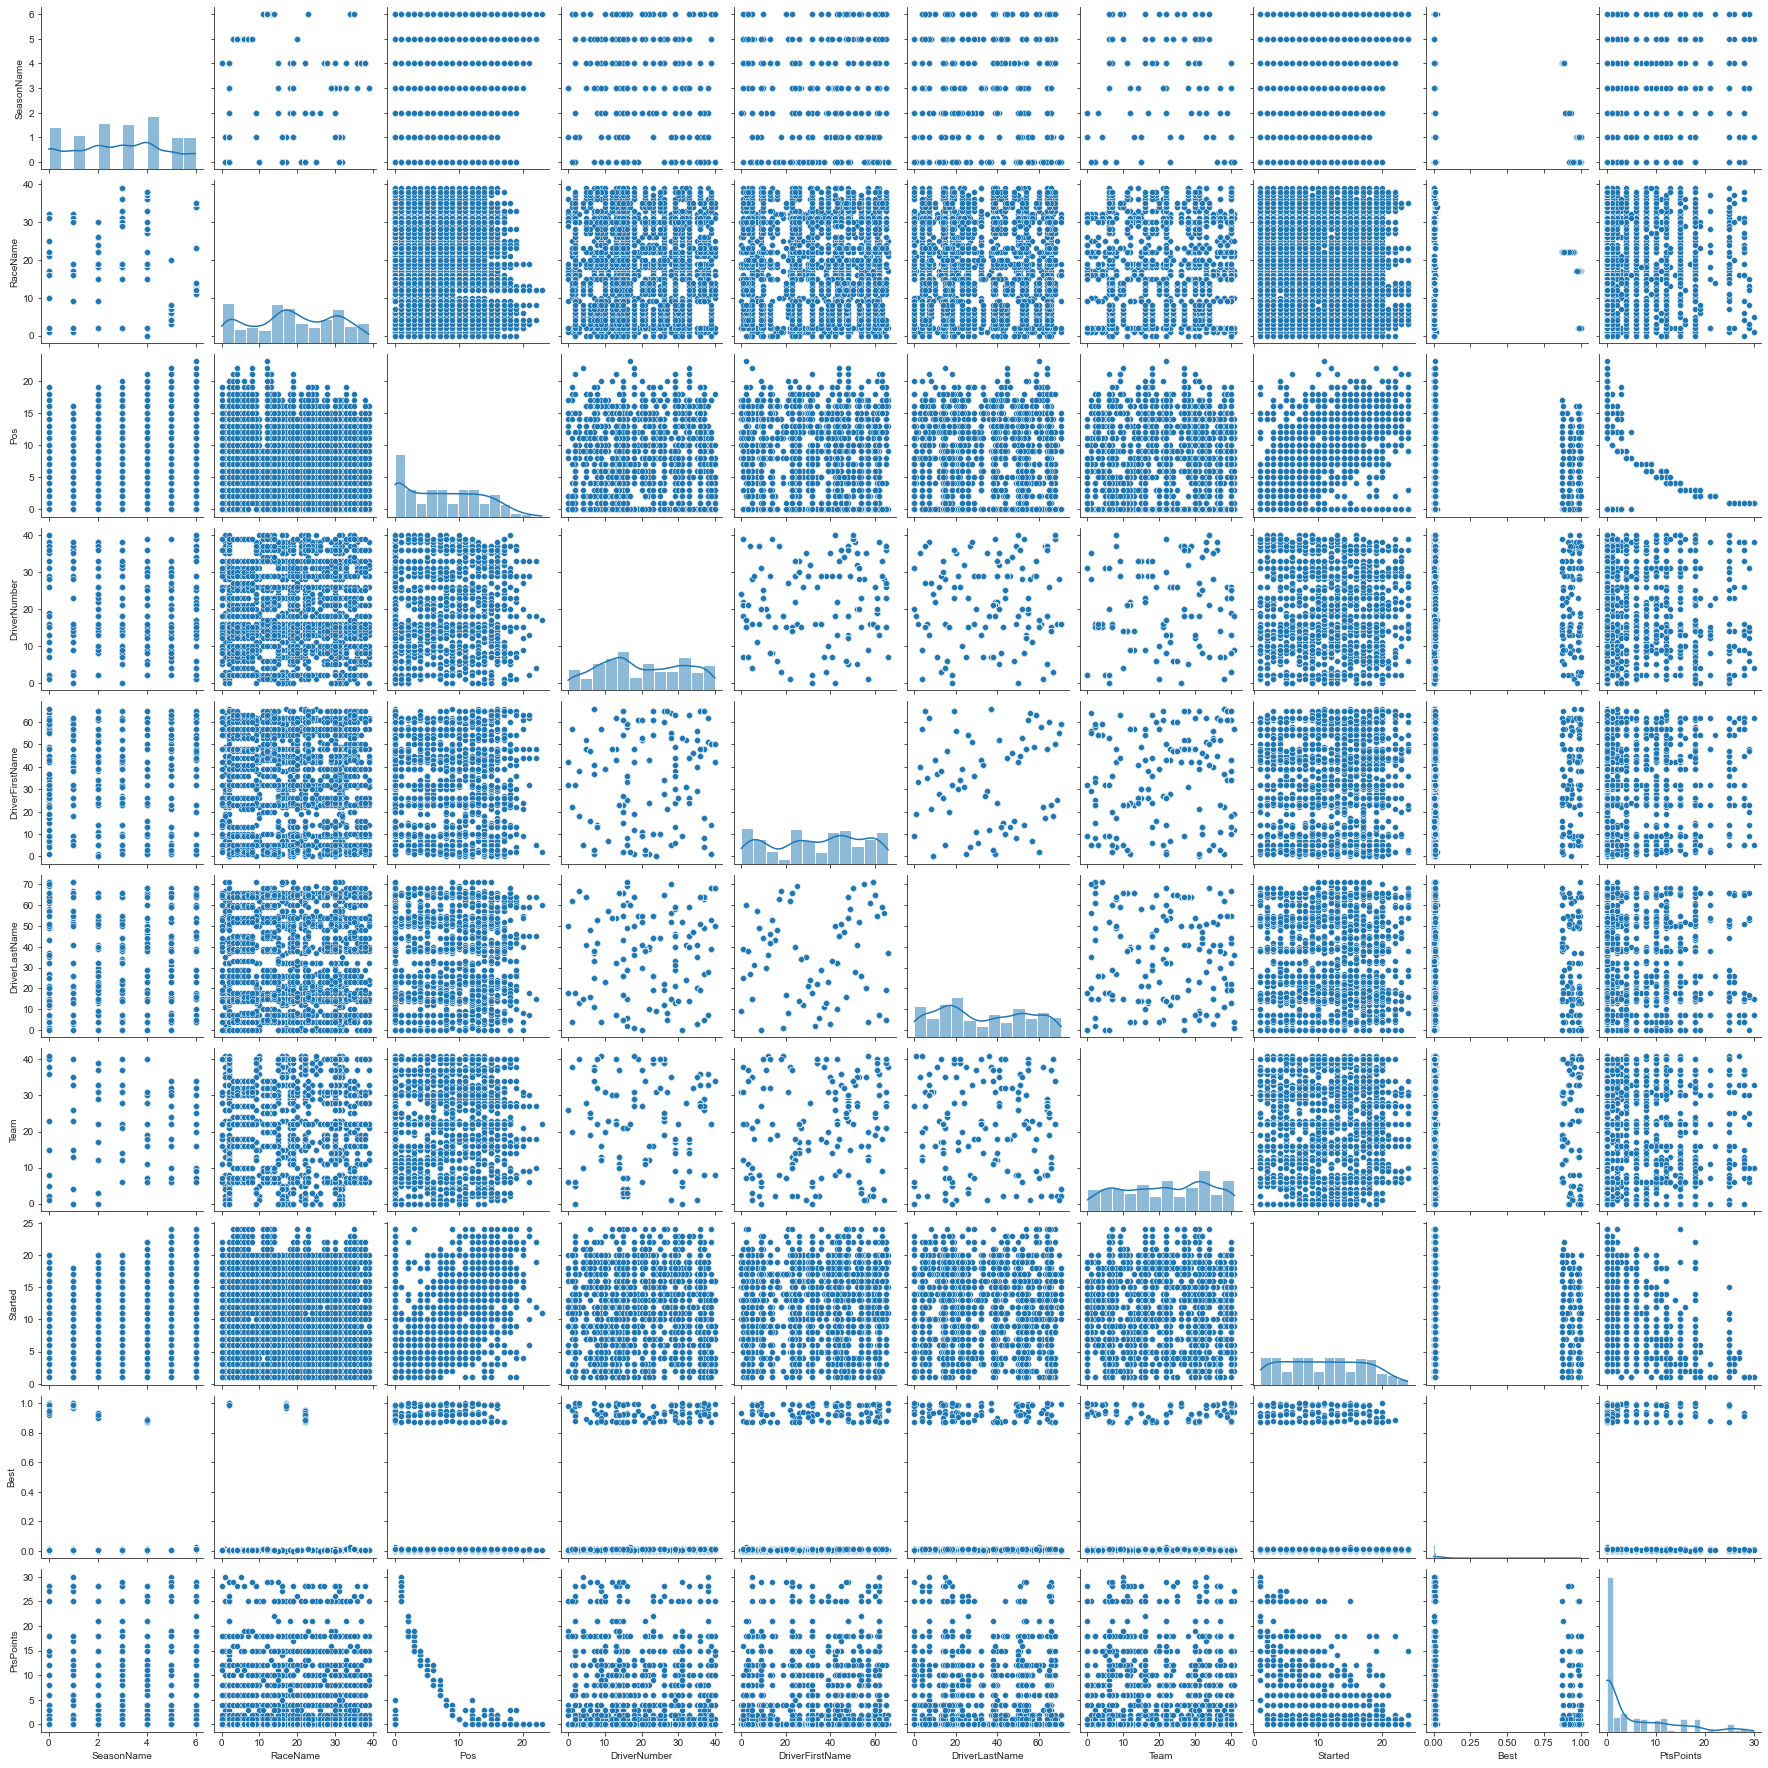

In [15]:
with sns.axes_style('ticks'):
    sns.pairplot(data=data,
                 diag_kws=dict(kde=True))
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

x = data.drop(columns=['PtsPoints'])
y = data['PtsPoints']
x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_scoring(y_true, y_pred):
    print('MAE: {};'.format(mean_absolute_error(y_true, y_pred)))
    print('MSE: {};'.format(mean_squared_error(y_true, y_pred)))
    print('R2: {}.'.format(r2_score(y_true, y_pred)))

In [18]:
lasso_regressor = LassoCV(cv=10)
lasso_regressor.fit(x_train, y_train)

LassoCV(cv=10)

In [19]:
lsr_pred = lasso_regressor.predict(x_test)

In [20]:
model_scoring(y_test, lsr_pred)

MAE: 4.521105265143465;
MSE: 34.88321420789881;
R2: 0.4347417130512222.


In [21]:
parameters_to_tune = {'polynomialfeatures__degree' : np.arange(2, 6, 1, dtype=int),
                      'linearregression__fit_intercept' : [True, False]}

In [22]:
def PolynomialRegression (degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [23]:
pr_gs = GridSearchCV(PolynomialRegression(), parameters_to_tune, cv=10,
                     scoring='neg_mean_absolute_error')
pr_gs.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([2, 3, 4, 5])},
             scoring='neg_mean_absolute_error')

In [24]:
pr_gs.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 3}

In [25]:
pr_gs.best_score_

-3.2212723735075257

In [26]:
polynomial_regressor = pr_gs.best_estimator_
polynomial_regressor.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [27]:
pr_pred = polynomial_regressor.predict(x_test)

In [28]:
model_scoring(y_test, pr_pred)

MAE: 3.450962717335745;
MSE: 27.217398769425532;
R2: 0.5589609342787121.


In [29]:
parameters_to_tune = {'degree': [3, 4, 5],
                      'coef0': np.arange(0, 8, 2.5, dtype=float),
                      'C' : [10.0, 100.0, 1000.0, 1e+4]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV

svr_poly_gs = RandomizedSearchCV(SVR(kernel='rbf'), parameters_to_tune, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
svr_poly_gs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [10.0, 100.0, 1000.0, 10000.0],
                                        'coef0': array([0. , 2.5, 5. , 7.5]),
                                        'degree': [3, 4, 5]},
                   scoring='neg_mean_absolute_error')

In [31]:
svr_poly_gs.best_params_

{'degree': 5, 'coef0': 2.5, 'C': 1000.0}

In [32]:
svr_poly_gs.best_score_

-3.458012626378532

In [33]:
svr_poly = svr_poly_gs.best_estimator_
svr_poly.fit(x_train, y_train)

SVR(C=1000.0, coef0=2.5, degree=5)

In [34]:
svr_poly_pred = svr_poly.predict(x_test)

In [35]:
model_scoring(y_test, svr_poly_pred)

MAE: 3.5952949254244673;
MSE: 29.624111548484354;
R2: 0.5199618232862258.


In [36]:
parameters_to_tune = {'max_depth' : [3, 4, 5, 6, 7, 8],
                      'min_samples_leaf' : np.linspace(0.01, 0.1, 10),
                      'max_features' : [0.2 , 0.4, 0.6, 0.8, 'auto', 'sqrt', 'log2']}

In [37]:
from sklearn.tree import DecisionTreeRegressor

dtr_gs = GridSearchCV(DecisionTreeRegressor(criterion='absolute_error', random_state=8),
                      parameters_to_tune, cv=5, scoring='neg_mean_absolute_error')
dtr_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='absolute_error',
                                             random_state=8),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 'auto', 'sqrt',
                                          'log2'],
                         'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])},
             scoring='neg_mean_absolute_error')

In [38]:
dtr_gs.best_params_

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 0.01}

In [39]:
dtr_gs.best_score_

-0.14346916696718356

In [40]:
dt_regressor = dtr_gs.best_estimator_
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      max_features='auto', min_samples_leaf=0.01,
                      random_state=8)

In [41]:
dt_pred = dt_regressor.predict(x_test)

In [42]:
model_scoring(y_test, dt_pred)

MAE: 0.2440677966101695;
MSE: 0.5423728813559322;
R2: 0.9912112237142039.


In [43]:
from sklearn.tree import export_text, export_graphviz

tree_rules = export_text(dt_regressor, feature_names=list(x_train.columns))
print(tree_rules)

|--- Pos <= 8.50
|   |--- Pos <= 0.50
|   |   |--- Started <= 2.50
|   |   |   |--- value: [3.00]
|   |   |--- Started >  2.50
|   |   |   |--- Best <= 0.00
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Best >  0.00
|   |   |   |   |--- Best <= 0.00
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- Best >  0.00
|   |   |   |   |   |--- SeasonName <= 0.50
|   |   |   |   |   |   |--- DriverNumber <= 14.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- DriverNumber >  14.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- SeasonName >  0.50
|   |   |   |   |   |   |--- Team <= 10.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- Team >  10.50
|   |   |   |   |   |   |   |--- DriverNumber <= 7.50
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- DriverNumber >  7.50
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |--- Pos >  0.50
|   |   |--- Pos <= 3.5

In [44]:
import graphviz

dot_data = export_graphviz(dt_regressor, feature_names=list(x_train.columns),
                            filled=True, rounded=True, special_characters=True, rotate=True)
graph = graphviz.Source(dot_data, format='svg', directory='images', filename='graph', engine='dot')
graph.render()

'images\\graph.svg'

In [45]:
from IPython.core.display import HTML
HTML('<img src="images/graph.svg" width=100%>')

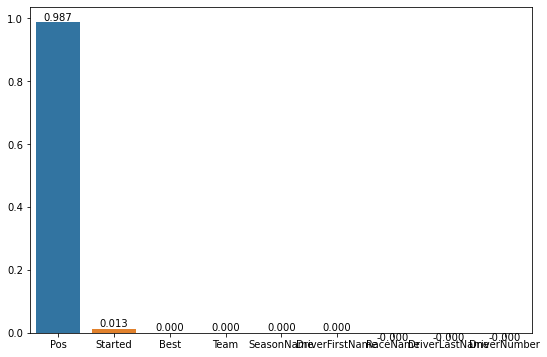

In [46]:
from operator import itemgetter
feature_importance_list = list(zip(x_train.columns.values, dt_regressor.feature_importances_))
sorted_list = sorted(feature_importance_list, key=itemgetter(1), reverse=True)
feature_order = [x for x, _ in sorted_list]

plt.figure(figsize=(9,6))
bar_plot = sns.barplot(x=x_train.columns.values, y=dt_regressor.feature_importances_, order=feature_order)
bar_plot.bar_label(bar_plot.containers[-1], fmt='%.3f')
plt.show()

In [47]:
X_sorted = data[feature_order]
y = data['PtsPoints']
X_train, X_test, y_train, y_test = train_test_split(X_sorted, y, test_size=0.2, random_state=8)

In [48]:
dt_regressor_sorted = dtr_gs.best_estimator_
dt_regressor_sorted.fit(X_train[X_train.columns[0:3]], y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      max_features='auto', min_samples_leaf=0.01,
                      random_state=8)

In [49]:
dt_sorted_pred = dt_regressor_sorted.predict(X_test[X_test.columns[0:3]])

In [50]:
model_scoring(y_test, dt_sorted_pred)

MAE: 0.15423728813559323;
MSE: 0.3177966101694915;
R2: 0.9929719174019709.
